# Getting known to Phonemes


In today world there exist many such areas where speech analytic is being actively used.

Indexing and recommending music according to the genre and similar content

Similarity search on the audio files - Shazam (An Apple subsidiary ) is a wonderful example for the same.

Speed processing and generating artificial voice.

For surveillance purpose

In upcoming recipes, we will see how to practically implement and used text to speech and speech to text in your project pipelines. Before getting in the practical stuff, let's see how to extract features from the speech signals to insert these features later into the pipeline.

Audio has three-dimensional representation, it has three-dimensional namely time, amplitude and frequency.

![](figures/audio_representation.png)

Figure: Showing three - components of the sound wave


The amplitude represents the power in the sound wave high amplitude sound will be loud and low amplitude sound will be quiet. The low-frequency sound might sound like a low rumble, while a high-frequency sound might sound more like a sizzle. 

We have a lot of options to read and manipulate the speech data. We will be using librosa for analyzing and extracting features of audio features. For playing audio in Ipython notebook we will be using pyAudio. librosa can be installed by simply using pip install librosa. Alternatively if the previous method fails you may install librosa to anaconda using `conda install -c conda-forge librosa`. The pyAudio can be installed as `pip install PyAudio`.

In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
% matplotlib inline

**Loading an audio file :** The audio file can be loaded through load function. When a file is loaded then it is decoded into 1-dimensional time series. The sampling rate is the sampling rate, by default it is 22KHz.

In [2]:
audio_path = 'data/toing.mp3'
ipd.Audio(audio_path)

Sampling can be disabled by specifying parameter sr = None. In this case, entire signal will be decoded to output and will be very lengthy to be processed by using machine learning pipeline.

In [3]:
time_series, sampling_rate = librosa.load(audio_path)
print(type(time_series), type(sampling_rate))

<class 'numpy.ndarray'> <class 'int'>


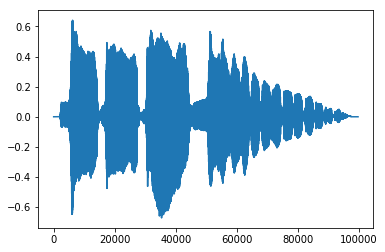

In [4]:
plt.plot(time_series)
plt.show()

## Visualizing
To display or visualize the audio signal one may use a function librosa.display. Librosa.display support the visualization in the form of wave plot, spectrogram, and colormap. The spectrogram is important to plot that shows the amplitude and frequency of the audio at a given time. Amplitude and frequency are important features of the audio signal. The waveform is used to plot waveform of amplitude versus time. Where Y axis is amplitude and X-axis is time. spectrogram and waveform for an example audio file are given below

### Plotting wave plot
A wavelet plot looks like as given below:

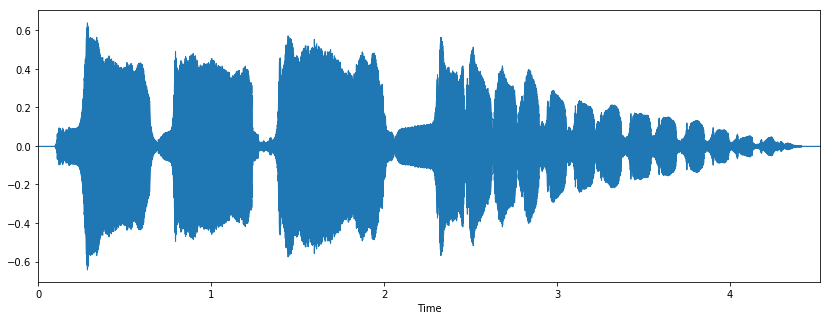

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(time_series, sampling_rate)

### Display Spectrogram
A spectrogram gram is the graphical representation of the spectrum of the frequency of sounds. here you can easily see the change in the frequency with respect to time.

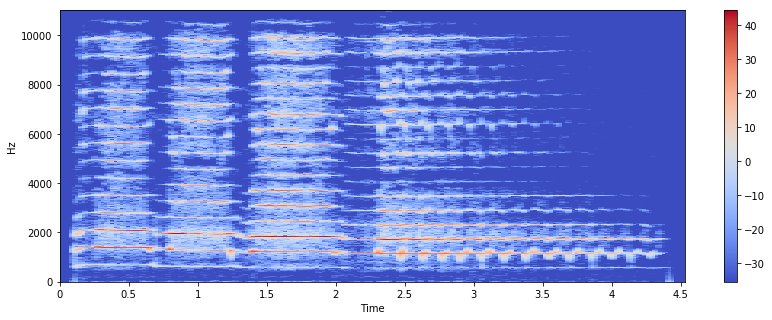

In [6]:
time_series_shift = librosa.stft(time_series)
Xdb = librosa.amplitude_to_db(abs(time_series_shift))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz') 
plt.colorbar()

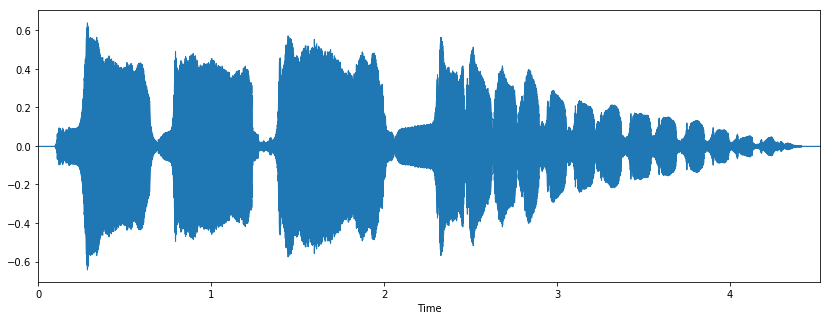

In [7]:
time_series, sampling_rate = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(time_series, sampling_rate)

## Feature Extraction

### Spectral Centroid
This is about finding the center of mass of the frequency distribution in the given audio. if the audio end with higher frequency than the spectrum will shift high towards ends. If the audio is uniform throughout then the spectral centroid will be towards center. Spectral centroid can be calculated as given below.


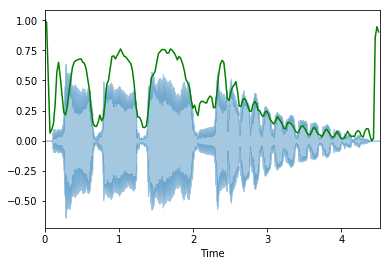

In [10]:
spectral_centroids = librosa.feature.spectral_centroid(time_series, sampling_rate)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
time_frame = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(time_series, axis=0):
    return sklearn.preprocessing.minmax_scale(time_series, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(time_series, sr=sampling_rate, alpha=0.4)
plt.plot(time_frame, normalize(spectral_centroids), color='green')

### Spectral Rolloff
Spectral rolloff where the frequency lower than the given percentage of the average frequency lies. let's say if we define the cutoff = 85% then only frequency lower than 85% of frequency is provided.

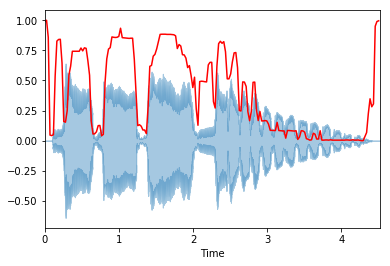

In [15]:
spectral_rolloff = librosa.feature.spectral_rolloff(time_series, sampling_rate)[0]
frames = range(len(spectral_rolloff))
time_frame = librosa.frames_to_time(frames)
librosa.display.waveplot(time_series, sr=sampling_rate, alpha=0.4)
plt.plot(time_frame, normalize(spectral_rolloff), color='red')

### MFCC — Mel-Frequency Cepstral Coefficients
MFCC is the most important feature while working with audio data. MFCC of the signal is a small set of feature which concisely describes the overall shape of the spectrum. By suing librosa, you can calculate MFCC as given below.
In MFCC the first dimension represents the number of MFCC and the second dimension represents the number of such frames available. 

MFCC Shape : (20, 195)


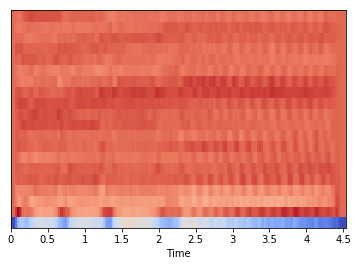

In [16]:
mfccs = librosa.feature.mfcc(time_series, sampling_rate)
print("MFCC Shape :",mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')